# CREDIT RISK ANALYSIS

# Essential libraries for analysis

In [77]:
# Libraries for data manipulation and numerical computation
import pandas as pd  # For handling and analyzing structured data in DataFrames
import numpy as np  # For performing numerical operations and computations

# Libraries for data visualization
import matplotlib.pyplot as plt  # For creating basic visualizations such as plots and charts
import seaborn as sns  # For advanced and aesthetically pleasing statistical visualizations
import matplotlib.colors as mcolors  # For color handling in plots

# Libraries for model creation, training, and evaluation
from sklearn.model_selection import train_test_split  # To split data into training and testing sets for model validation
from sklearn.linear_model import LogisticRegression  # For creating and training logistic regression models
from sklearn.ensemble import RandomForestClassifier  # For building and training Random Forest classification models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For assessing model performance

# Additional library for pretty-printing tabular data
from tabulate import tabulate  # For displaying tabular data in a formatted manner


# DATA IMPORTATION
##### Import the dataset into jupyter notebook environment

In [18]:
# Read the file path from the text file
with open('file_path.txt', 'r') as file: data_path = file.readline().strip()

# Load the dataset using the path
credit_df = pd.read_csv(data_path)

# DATA EXPLORATORY AND MANIPULATION
##### Gain a comprehensive understanding of the dataset to extract meaningful insights and prepare for in-depth analysis.

In [19]:
# Display the dataset
display(credit_df)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [20]:
# Cehck the dataset dimension
df_dim = credit_df.shape
num_columns, num_rows = df_dim[1], df_dim[0]

print(f" The dataset contains {num_columns} columns and {num_rows} rows")


 The dataset contains 12 columns and 32581 rows


In [21]:
# Display all column names in the credit risk dataset
print("Column names in the credit risk dataset:")
for index, column in enumerate(credit_df.columns, start=1):
    print(f"{index}. {column}")

Column names in the credit risk dataset:
1. person_age
2. person_income
3. person_home_ownership
4. person_emp_length
5. loan_intent
6. loan_grade
7. loan_amnt
8. loan_int_rate
9. loan_status
10. loan_percent_income
11. cb_person_default_on_file
12. cb_person_cred_hist_length


### Column Renaming
##### To facilitate easier computation and analysis, we rename specific columns for clarity and consistency.

In [22]:
# Update column names to simplify computation
columns_to_rename = {
    'person_age': 'age',
    'person_home_ownership': 'house',
    'person_income': 'income',
    'person_emp_length': 'emp_period',
    'loan_amnt': 'loan_amt',
    'cb_person_default_on_file' : 'default_on_file',
    'cb_person_cred_hist_length': 'cred_hist'
}

credit_df.rename(columns=columns_to_rename, inplace=True)


In [23]:
# Print summary details about the 'credit_df'
print("Overview of the dataset:")
credit_df.info() 

Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  32581 non-null  int64  
 1   income               32581 non-null  int64  
 2   house                32581 non-null  object 
 3   emp_period           31686 non-null  float64
 4   loan_intent          32581 non-null  object 
 5   loan_grade           32581 non-null  object 
 6   loan_amt             32581 non-null  int64  
 7   loan_int_rate        29465 non-null  float64
 8   loan_status          32581 non-null  int64  
 9   loan_percent_income  32581 non-null  float64
 10  default_on_file      32581 non-null  object 
 11  cred_hist            32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [24]:
# Check for missing values in the dataset
missing_values = credit_df.isnull().values.any()

# Display information about missing values per column
print("Dataset Missing Values Information:")
print("=" * 43)
print(f"{'Column Name':<26} | {'Missing Values':<15}")
print("=" * 43)

# Print the number of missing values for each column
missing_counts = credit_df.isnull().sum()
for column, count in missing_counts.items():
    print(f"{column:<26} | {count:<15}")

print("=" * 43)

# Print whether there are any missing values in the entire dataset
print("\nIs there any missing value in the dataset?", "Yes, data needs cleaning" if missing_values else "No, Data's clean")


Dataset Missing Values Information:
Column Name                | Missing Values 
age                        | 0              
income                     | 0              
house                      | 0              
emp_period                 | 895            
loan_intent                | 0              
loan_grade                 | 0              
loan_amt                   | 0              
loan_int_rate              | 3116           
loan_status                | 0              
loan_percent_income        | 0              
default_on_file            | 0              
cred_hist                  | 0              

Is there any missing value in the dataset? Yes, data needs cleaning


# DATA CLEANING AND PREPROCESSING 
###### Addressing missing values is essential to maintain accuracy and prevent bias in subsequent analysis.  

In [25]:
# Handle missing values with KNNImputer
from sklearn.impute import KNNImputer

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
credit_df[['emp_period', 'loan_int_rate']] = imputer.fit_transform(credit_df[['emp_period', 'loan_int_rate']])


In [26]:
# Check for missing values in the dataset after imputation with the KNNImputer
missing_values = credit_df.isnull().values.any()

# Display information about missing values per column
print("Dataset Missing Values Information:")
print("=" * 43)
print(f"{'Column Name':<26} | {'Missing Values':<15}")
print("=" * 43)

# Print the number of missing values for each column
missing_counts = credit_df.isnull().sum()
for column, count in missing_counts.items():
    print(f"{column:<26} | {count:<15}")

print("=" * 43)

# Print whether there are any missing values in the entire dataset
print("\nIs there any missing value in the dataset after the KNNImputer?", "Yes, You have to tackle the missing values" if missing_values else "No, the KNNimputer worked")


Dataset Missing Values Information:
Column Name                | Missing Values 
age                        | 0              
income                     | 0              
house                      | 0              
emp_period                 | 0              
loan_intent                | 0              
loan_grade                 | 0              
loan_amt                   | 0              
loan_int_rate              | 0              
loan_status                | 0              
loan_percent_income        | 0              
default_on_file            | 0              
cred_hist                  | 0              

Is there any missing value in the dataset after the KNNImputer? No, the KNNimputer worked


In [39]:
# Define the bins and labels for the age groups
bins = [0, 32, 55, float('inf')]
labels = ['20-32', '33-55', '56+']

# Create the 'age_group' column
credit_df['age_group'] = pd.cut(credit_df['age'], bins=bins, labels=labels, right=True)

### Analysis of Unique Values in Each Column
##### Now that the dataset has been cleaned, we can move forward to gain more detailed insights.
##### We will explore the unique values within the categorical columns to better understand the data distribution.

In [40]:
# Explore unique values in categorical columns
categorical_columns = credit_df.select_dtypes(include='object').columns

# Display information about categorical columns
print("Unique Values in Categorical Columns:\n")
for column in categorical_columns:
    unique_values = credit_df[column].unique()
    print(f"Column '{column}':")
    print(f"Number of Unique Values: {len(unique_values)}")
    print(f"Unique Values: {unique_values}\n")

# Display the total number of categorical columns
num_categorical_columns = len(categorical_columns)
print(f"Total number of categorical columns in the dataset: {num_categorical_columns}")


Unique Values in Categorical Columns:

Column 'house':
Number of Unique Values: 4
Unique Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Column 'loan_intent':
Number of Unique Values: 6
Unique Values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column 'loan_grade':
Number of Unique Values: 7
Unique Values: ['D' 'B' 'C' 'A' 'E' 'F' 'G']

Column 'default_on_file':
Number of Unique Values: 2
Unique Values: ['Y' 'N']

Total number of categorical columns in the dataset: 4


### Create a duplicate of the preprocessed dataset for further analysis.

In [28]:
# create a copy of the credit_risk_df and name is 'credit_risk_dt'
credit_df2 = credit_df.copy()
credit_df2

,age,income,house,emp_period,loan_intent,loan_grade,loan_amt,loan_int_rate,loan_status,loan_percent_income,default_on_file,cred_hist
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Create a mapping for the 'default_on_file' column, which contains binary values, and apply one-hot encoding to the other three columns. This step is essential because machine learning models require numerical data as input.

In [29]:
# Replace values in 'default_on_file' with their corresponding mapped values.
credit_df2['default_on_file'] = credit_df2['default_on_file'].replace({'N': 0, 'Y': 1})

# Preview the updated DataFrame.
credit_df2.head()

C:\Users\Kintonde\AppData\Local\Temp\ipykernel_10684\3251812303.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  credit_df2['default_on_file'] = credit_df2['default_on_file'].replace({'N': 0, 'Y': 1})


,age,income,house,emp_period,loan_intent,loan_grade,loan_amt,loan_int_rate,loan_status,loan_percent_income,default_on_file,cred_hist
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4


# EXPLORATORY DATA ANALYSIS

### Descriptive statistics for all columns

In [30]:
# Descriptive statistics for all columns
full_stats = credit_df.describe(include='all')

print(full_stats)

                 age        income  house    emp_period loan_intent  \
count   32581.000000  3.258100e+04  32581  32581.000000       32581   
unique           NaN           NaN      4           NaN           6   
top              NaN           NaN   RENT           NaN   EDUCATION   
freq             NaN           NaN  16446           NaN        6453   
mean       27.734600  6.607485e+04    NaN      4.803840         NaN   
std         6.348078  6.198312e+04    NaN      4.101486         NaN   
min        20.000000  4.000000e+03    NaN      0.000000         NaN   
25%        23.000000  3.850000e+04    NaN      2.000000         NaN   
50%        26.000000  5.500000e+04    NaN      4.000000         NaN   
75%        30.000000  7.920000e+04    NaN      7.000000         NaN   
max       144.000000  6.000000e+06    NaN    123.000000         NaN   

       loan_grade      loan_amt  loan_int_rate   loan_status  \
count       32581  32581.000000   32581.000000  32581.000000   
unique          7  

# Plot a Histogram to understand data distribution

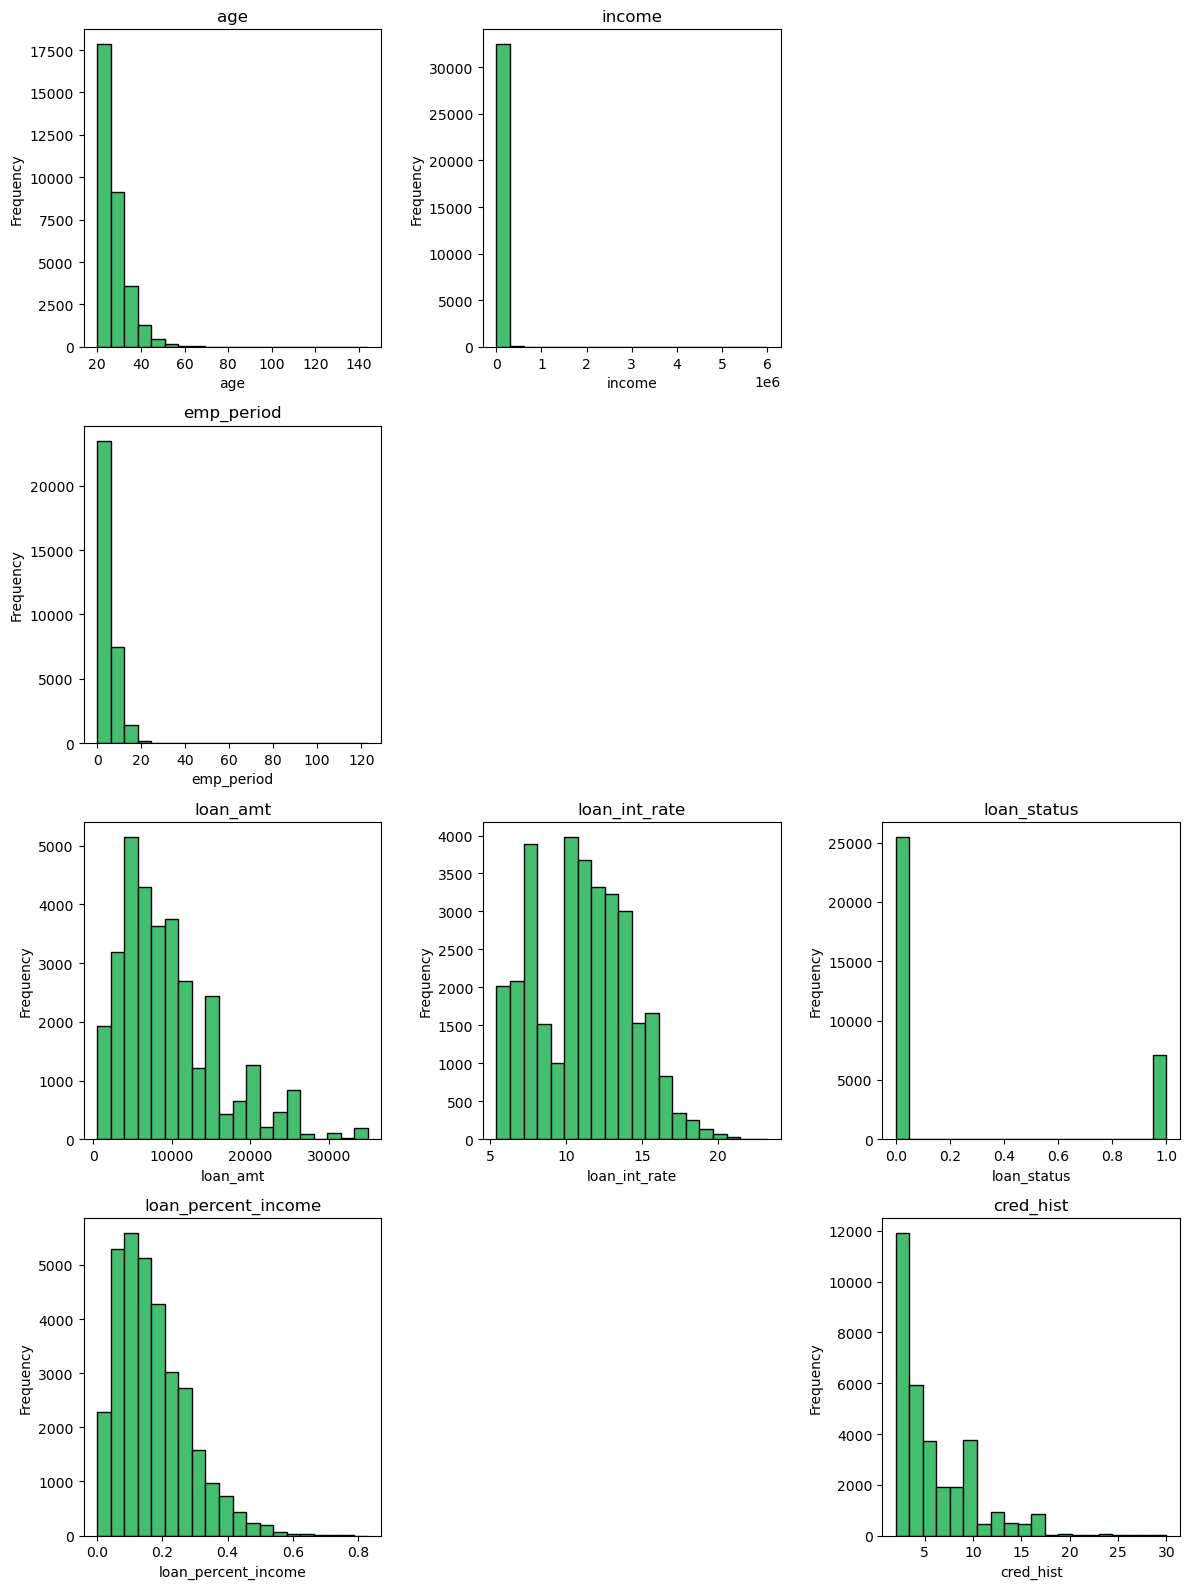

In [31]:
# Get column names
column_names = credit_df.columns

# Set the number of columns and rows for the layout
num_cols = 3
num_rows = 4

# Create subplots with a fixed layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

# Flatten the array of axes for easier iteration
axs = axs.flatten()

# Ensure the loop only runs up to the number of subplots available
for i, col in enumerate(column_names[:len(axs)]):  # Limit to the number of subplots
    if credit_df[col].dtype in [np.int64, np.float64]:  # Check if the column is numeric
        ax = axs[i]
        ax.hist(credit_df[col], bins=20, color=plt.cm.viridis(0.7), edgecolor='black')  # Use viridis colormap
        ax.set_title(col, fontsize=12)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
    else:
        # Hide axes for non-numeric columns
        axs[i].axis('off')

# Hide any unused subplots (if there are fewer columns than subplots)
for i in range(len(column_names), len(axs)):
    axs[i].axis('off')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()



C:\Users\Kintonde\AppData\Local\Temp\ipykernel_10684\1507174772.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  set2_colors = cm.get_cmap('Set2', len(default_counts))
C:\Users\Kintonde\AppData\Local\Temp\ipykernel_10684\1507174772.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), 0.70, color='white', fc='white', edgecolor='black')


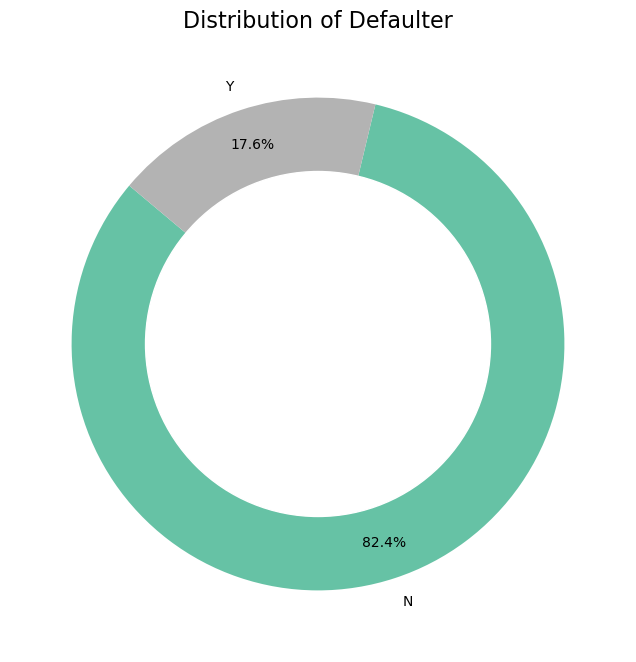

In [34]:
from matplotlib import cm
# Count the occurrences of each value in the 'default_on_file' column
default_counts = credit_df['default_on_file'].value_counts()

# Get colors from the 'Set2' colormap
set2_colors = cm.get_cmap('Set2', len(default_counts))

# Plot a donut chart
plt.figure(figsize=(8, 8))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=set2_colors.colors)

# Draw a circle in the middle to make it a donut chart
circle = plt.Circle((0, 0), 0.70, color='white', fc='white', edgecolor='black')
plt.gca().add_artist(circle)

# Set the title of the chart
plt.title('Distribution of Defaulter', fontsize=16)

# Show the chart
plt.show()


The chart illustrates the distribution of loan defaults in the dataset:

 - No (Non-defaulters): Represents approximately four-fifths (about 82%) of the total records, with 26,836 individuals.

- Yes (Defaulters): Accounts for about one-fifth (about 18%) of the total records, with 5,745 individuals.

This confirms that non-defaulters make up the majority, while defaulters constitute a smaller portion of the dataset.

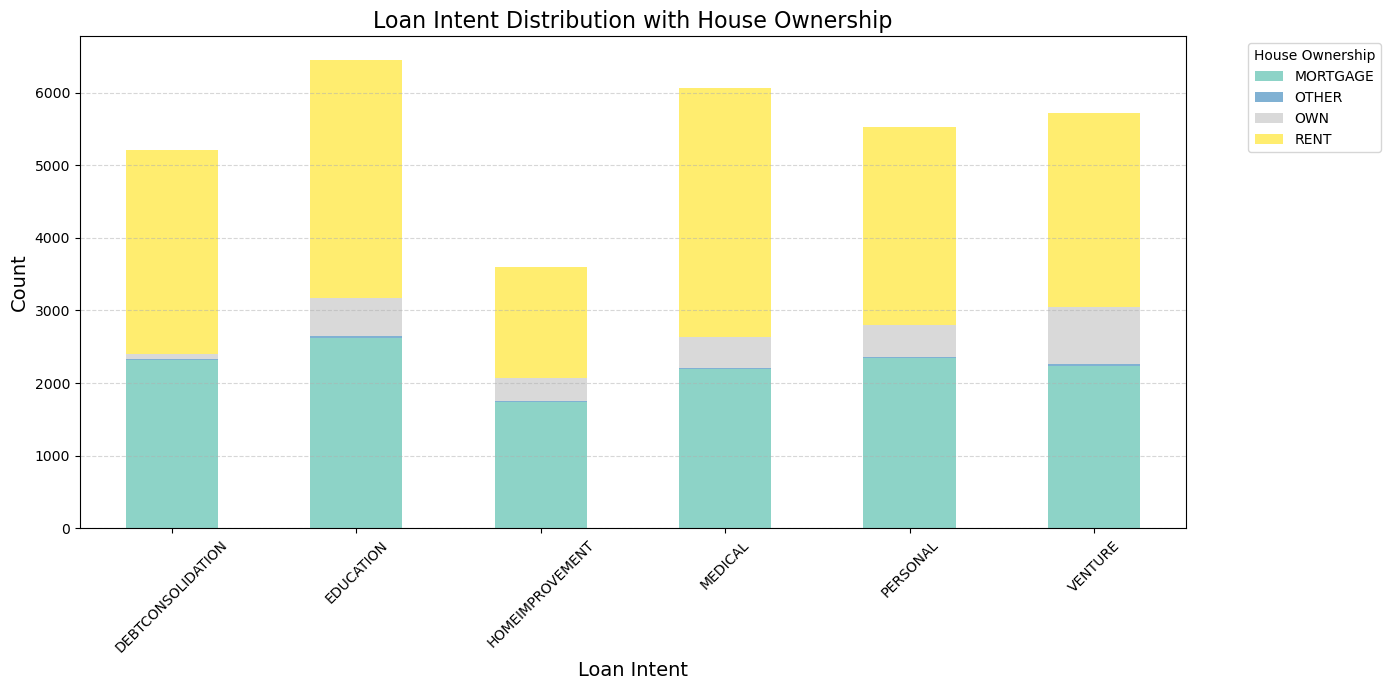

In [35]:
# Group the data by 'loan_intent' and 'house', and count the occurrences
grouped_data = credit_df.groupby(['loan_intent', 'house']).size().unstack(fill_value=0)

# Normalize the data to get percentages
#grouped_df = round(grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100, 2)

# Plotting the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set3')

# Annotate percentages on the chart for "Other" category
for i, column in enumerate(grouped_data.columns):
    for bar in ax.patches[i::len(grouped_data.columns)]:
        height = bar.get_height()
        if column == "Other" and height > 0:  # Highlight the "Other" category
            ax.annotate(f'{height:.1f}%', 
                        xy=(bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2.),
                        xytext=(0, 0), textcoords="offset points",
                        ha='center', va='center', fontsize=9, color='white', fontweight='bold')

# Customize the plot
plt.title('Loan Intent Distribution with House Ownership', fontsize=16)
plt.xlabel('Loan Intent', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='House Ownership', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines for better readability
plt.tight_layout()

# Show the plot
plt.show()


The chart displays the distribution of loan intent across different housing statuses. The data shows:

- **MORTGAGE**: The majority of loan intents are associated with individuals who have a mortgage, with the highest counts for **DEBTCONSOLIDATION** (2,312), **EDUCATION** (2,627), and **PERSONAL** (2,340) loans.
- **OTHER**: This category shows relatively low counts across all loan intents, with **VENTURE** (26) having the highest number, while other loan intents remain below 20.
- **OWN**: The number of individuals with homeownership (own) is significant for **DEBTCONSOLIDATION** (72) and **VENTURE** (786), but lower for other intents.
- **RENT**: Individuals who rent are prevalent in **DEBTCONSOLIDATION** (2,811) and **EDUCATION** (3,281) loan intents, indicating these are common loan purposes for renters.

The chart likely emphasizes that renters are most common in **DEBTCONSOLIDATION** and **EDUCATION** loan intents, whereas individuals with a mortgage are most frequent in **MORTGAGE** and **PERSONAL** loan intents.

C:\Users\Kintonde\AppData\Local\Temp\ipykernel_10684\2038158870.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data2 = credit_df.groupby(['age_group', 'default_on_file']).size().unstack(fill_value=0)


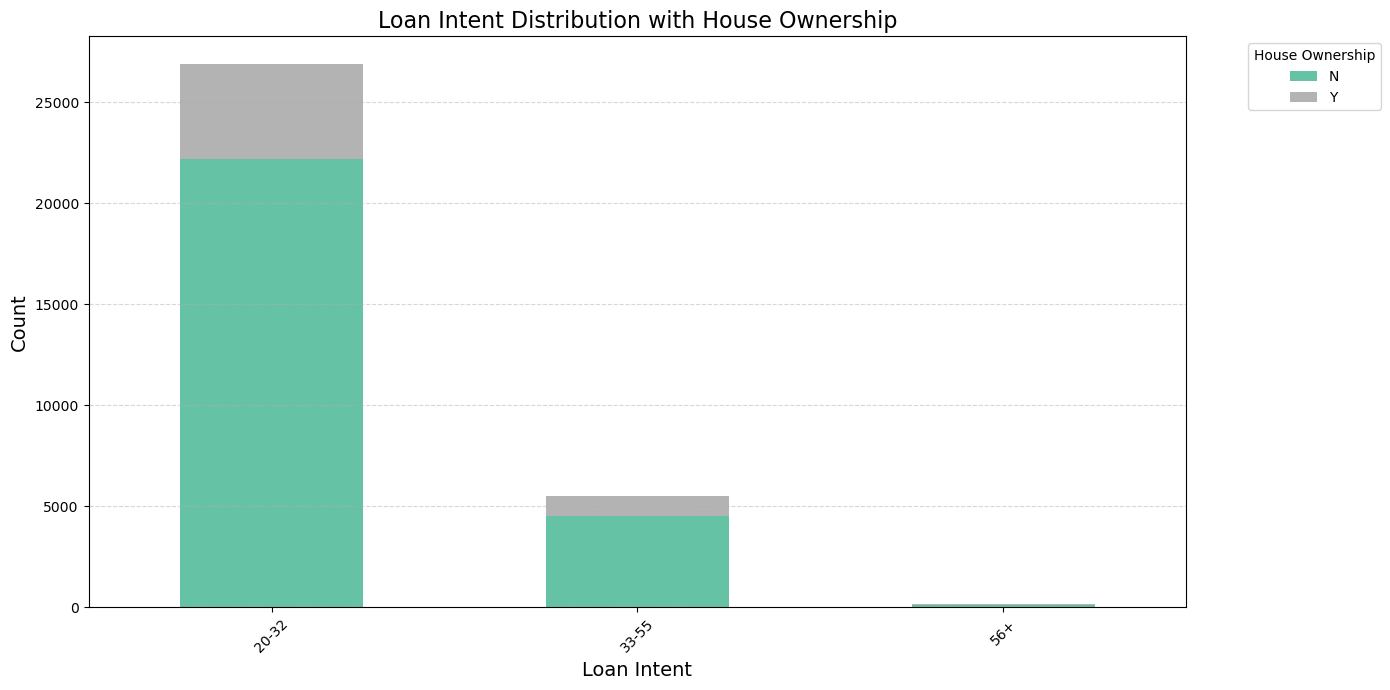

In [41]:
# Group the data by 'loan_intent' and 'house', and count the occurrences
grouped_data2 = credit_df.groupby(['age_group', 'default_on_file']).size().unstack(fill_value=0)

# Normalize the data to get percentages
##grouped_df2 = round(grouped_data2.div(grouped_data.sum(axis=1), axis=0) * 100, 2)

# Plotting the stacked bar chart
ax = grouped_data2.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set2')

# Annotate percentages on the chart for "Other" category
for i, column in enumerate(grouped_data2.columns):
    for bar in ax.patches[i::len(grouped_data2.columns)]:
        height = bar.get_height()
        if column == "Other" and height > 0:  # Highlight the "Other" category
            ax.annotate(f'{height:.1f}%', 
                        xy=(bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2.),
                        xytext=(0, 0), textcoords="offset points",
                        ha='center', va='center', fontsize=9, color='white', fontweight='bold')

# Customize the plot
plt.title('Loan Intent Distribution with House Ownership', fontsize=16)
plt.xlabel('Loan Intent', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='House Ownership', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines for better readability
plt.tight_layout()

# Show the plot
plt.show()


The chart visualizes the distribution of loan defaults across different age groups. The data indicates that:

- **Age Group 20-32**: This group has the highest number of records, with 22,202 non-defaulters (N) and 4,728 defaulters (Y). 
- **Age Group 33-55**: This group shows a significantly lower number of records compared to the 20-32 age group, with 4,522 non-defaulters and 990 defaulters.
- **Age Group 56+**: This group has the lowest counts, with 112 non-defaulters and 27 defaulters.

The chart likely highlights that the younger age group (20-32) has the highest number of defaults in absolute terms, although the proportion of defaulters may vary across age groups.

# Relationship between Loan Amount and Loan Interest Rate

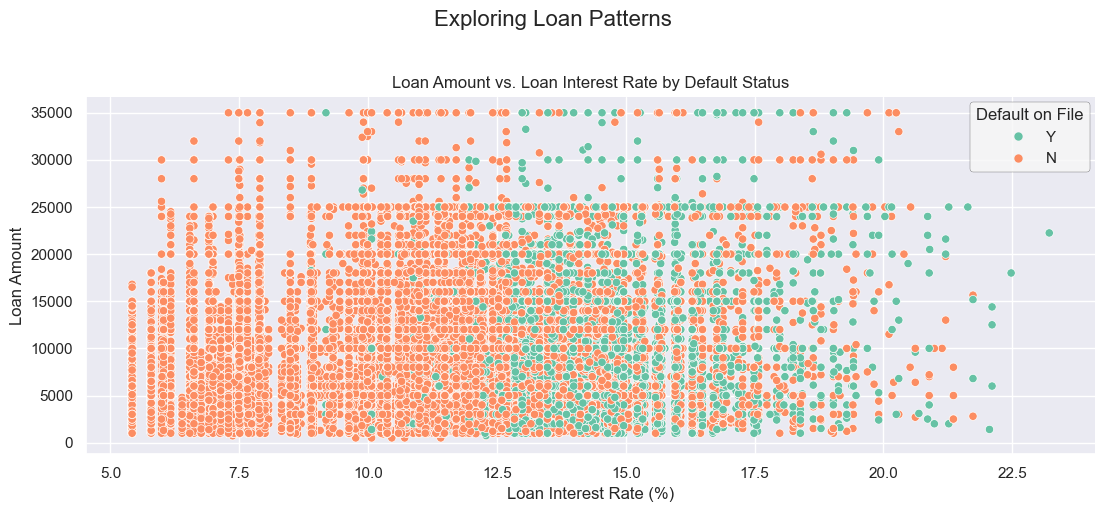

In [42]:
# Set seaborn theme
sns.set_theme(style="darkgrid")

# Plot relational chart
plot = sns.relplot(
    data=credit_df,
    y='loan_amt',
    x='loan_int_rate',
    hue="default_on_file",  # Different markers for 'Y' and 'N'
    palette="Set2",  # Appealing color scheme
    height=5,  # Control plot size
    aspect=2,  # Adjust aspect ratio
    alpha=1,  # Add transparency
)

# Customize the plot
plot.set(title="Loan Amount vs. Loan Interest Rate by Default Status",
         xlabel="Loan Interest Rate (%)",
         ylabel="Loan Amount")

# Customize legend to stand out
legend = plot.legend
legend.set_title("Default on File")
legend.get_frame().set_edgecolor('black')  # Add a border to the legend
legend.get_frame().set_linewidth(0.2)  # Make border line thicker
legend.get_frame().set_facecolor('#f7f7f7')  # Light background for better visibility
legend.set_bbox_to_anchor((0.979, 0.75))  # Position legend outside the plot
legend.set_frame_on(True)  # Ensure frame is visible

# Add a larger title with spacing
plot.fig.suptitle("Exploring Loan Patterns", y=1.02, fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


### The chart indicates no significant relationship between loan amount and interest rate. However, it reveals that most loan defaulters fall within the high-interest rate range of 12.5% to 22.5%.

# ONE HOT ENCODER
### We use One-Hot Encoder to convert categorical data into a numerical format that machine learning models can understand. It transforms each category into a binary vector, ensuring no ordinal relationship is implied among categories. This is essential for algorithms that assume numerical inputs, avoiding incorrect interpretations of categorical values.

In [73]:
# Define a list of categorical columns for potential one-hot encoding
cat_col = ['house', 'loan_intent', 'loan_grade']

# Create dummy variables for the specified categorical columns with drop_first=True to avoid multicollinearity
dummy_df = pd.get_dummies(
    credit_df2,
    columns=cat_col,
    drop_first=True,
    dtype=int  # Ensure the data type is integer for consistency
)

# Display information about the resulting DataFrame with dummy variables
print("Information about the DataFrame with one-hot encoded columns:")
dummy_df.info()

Information about the DataFrame with one-hot encoded columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          32581 non-null  int64  
 1   income                       32581 non-null  int64  
 2   emp_period                   32581 non-null  float64
 3   loan_amt                     32581 non-null  int64  
 4   loan_int_rate                32581 non-null  float64
 5   loan_status                  32581 non-null  int64  
 6   loan_percent_income          32581 non-null  float64
 7   default_on_file              32581 non-null  int64  
 8   cred_hist                    32581 non-null  int64  
 9   house_OTHER                  32581 non-null  int32  
 10  house_OWN                    32581 non-null  int32  
 11  house_RENT                   32581 non-null  int32  
 12  loan_intent_

# CORRELATION COEFFICIENNT
### Calculation the corr coefficient for feature selection

In [45]:
# Calculate correlation coefficients between 'loan_int_rate' and numerical features
correlation_matrix = dummy_df.corr()
loan_int_rate_corr = correlation_matrix['loan_int_rate'].sort_values(ascending=False)

# Display correlation coefficients
print("Correlation coefficients with 'loan_int_rate':")
print(loan_int_rate_corr)

# Select the top two features with the highest absolute correlation coefficients
additional_features = loan_int_rate_corr[1:8].index.tolist()
print("\nRecommended additional features based on correlation result:", additional_features)


Correlation coefficients with 'loan_int_rate':
loan_int_rate                  1.000000
default_on_file                0.472756
loan_grade_D                   0.452178
loan_grade_C                   0.353898
loan_status                    0.315338
loan_grade_E                   0.306739
loan_grade_F                   0.188463
loan_amt                       0.139247
house_RENT                     0.131546
loan_grade_G                   0.121350
loan_percent_income            0.114415
loan_intent_HOMEIMPROVEMENT    0.019072
cred_hist                      0.017745
house_OTHER                    0.017049
age                            0.013437
loan_intent_MEDICAL            0.007378
income                         0.001519
loan_intent_PERSONAL          -0.001961
loan_grade_B                  -0.002566
loan_intent_VENTURE           -0.007940
loan_intent_EDUCATION         -0.009105
house_OWN                     -0.013840
emp_period                    -0.063819
Name: loan_int_rate, dtype: float

### Correlation Vizs

C:\Users\Kintonde\AppData\Local\Temp\ipykernel_10684\1453433972.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Coefficient', y='Feature', data=loan_int_rate_corr_df, palette=theme_1)
C:\Users\Kintonde\AppData\Local\Temp\ipykernel_10684\1453433972.py:21: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(x='Coefficient', y='Feature', data=loan_int_rate_corr_df, palette=theme_1)


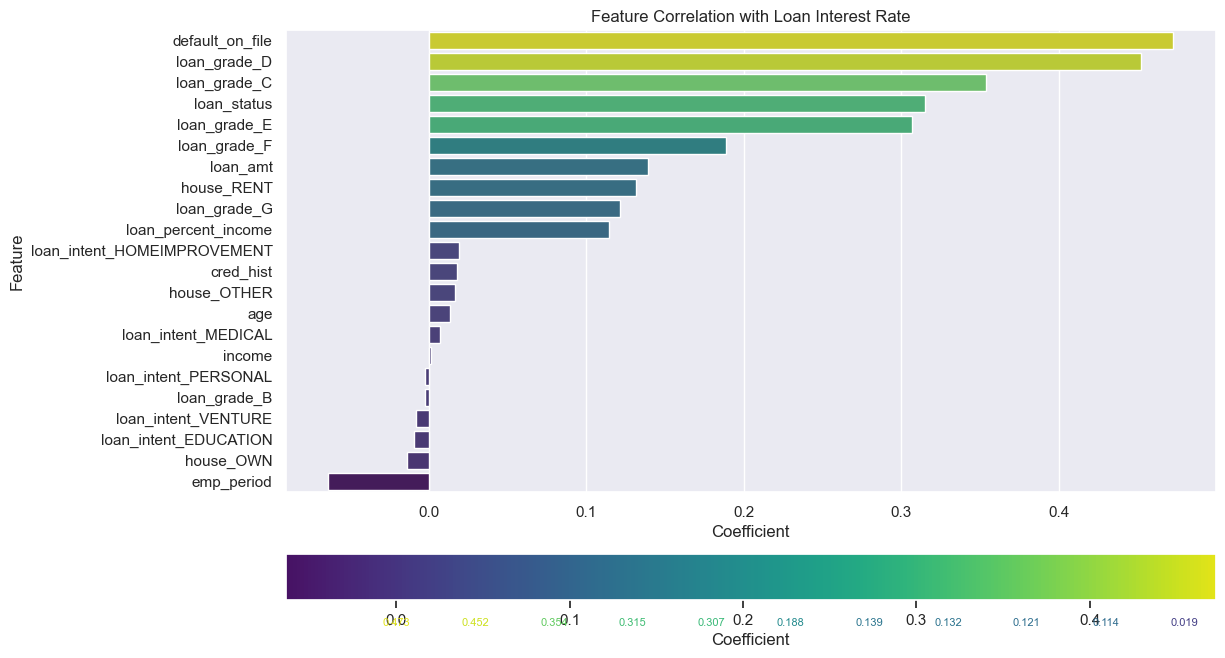

In [ ]:
# Convert the Series to a DataFrame for better handling
loan_int_rate_corr_df = loan_int_rate_corr.reset_index()
loan_int_rate_corr_df.columns = ['Feature', 'Coefficient']

# Remove 'loan_int_rate' from the DataFrame
loan_int_rate_corr_df = loan_int_rate_corr_df[loan_int_rate_corr_df['Feature'] != 'loan_int_rate']

# Create a horizontal bar plot with custom colors and color scale
plt.figure(figsize=(12, 8))

# Define a custom color scale based on the coefficients
cmap = mcolors.LinearSegmentedColormap.from_list('Custom', sns.color_palette('viridis', n_colors=len(loan_int_rate_corr_df)))

# Map coefficients to colors using the color map
norm = plt.Normalize(loan_int_rate_corr_df['Coefficient'].min(), loan_int_rate_corr_df['Coefficient'].max())
theme_1 = cmap(norm(loan_int_rate_corr_df['Coefficient']))

# Plot horizontal bars with color mapping
bars = sns.barplot(x='Coefficient', y='Feature', data=loan_int_rate_corr_df, palette=theme_1)

# Add color scale using a colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), orientation='horizontal', pad=0.1, ax=plt.gca())
cbar.set_label('Coefficient')

# Annotate the color scale with coefficient values
for i, (val, color) in enumerate(zip(loan_int_rate_corr_df['Coefficient'], theme_1)):
    cbar.ax.annotate(f'{val:.3f}', color=color, xy=(i / len(loan_int_rate_corr_df), 0), xytext=(0, -20),
                     textcoords='offset points', ha='center', va='bottom', fontsize=8)

# Set a title for the chart and the axis
plt.title('Feature Correlation with Loan Interest Rate')
plt.ylabel('Feature')

# Show the plot
plt.show()

# MACHINE LEARNING
### Set the feature varibales as ['loan_int_rate', 'loan_percent_income', 'loan_amt']
### and Target Varibale as Default_on_file

In [57]:
# Define features and target variable
features = ['loan_int_rate', 'loan_percent_income', 'loan_amt']
target = 'default_on_file'

# Extract features (X) and target variable (y)
X = dummy_df[features]
y = dummy_df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Display the shapes of the training and testing sets
print(f"Training features shape (X_train): {X_train.shape}")
print(f"Testing features shape (X_test): {X_test.shape}")


Training features shape (X_train): (26064, 3)
Testing features shape (X_test): (6517, 3)


# LOGISTIC REGRESSION
### Build a Logistic Regression model

In [ ]:
# Initialize the logistic regression model
logistic_model = LogisticRegression(random_state=43, max_iter=1000)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Predict loan status for the testing data
y_pred = logistic_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)  # Convert to dictionary for better formatting
conf_matrix = confusion_matrix(y_test, y_pred)

# Tabular format for classification report
classification_df = pd.DataFrame(report).T  # Transpose to align rows and columns
print("Classification Report: Logistic Regression")
print(tabulate(classification_df, headers='keys', tablefmt='fancy_grid'))

# Display the accuracy in a table format
accuracy_df = pd.DataFrame({'Metric': ['Accuracy'], 'Value': [accuracy]})
print("\nModel Accuracy:")
print(tabulate(accuracy_df, headers='keys', tablefmt='fancy_grid'))

# Tabular format for confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print("\nConfusion Matrix:")
print(tabulate(conf_matrix_df, headers='keys', tablefmt='fancy_grid'))


Classification Report: Logistic Regression
╒══════════════╤═════════════╤══════════╤════════════╤═════════════╕
│              │   precision │   recall │   f1-score │     support │
╞══════════════╪═════════════╪══════════╪════════════╪═════════════╡
│ 0            │    0.855885 │ 0.943438 │   0.897532 │ 5357        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ 1            │    0.504902 │ 0.266379 │   0.348758 │ 1160        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ accuracy     │    0.822925 │ 0.822925 │   0.822925 │    0.822925 │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ macro avg    │    0.680393 │ 0.604909 │   0.623145 │ 6517        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ weighted avg │    0.793411 │ 0.822925 │   0.799852 │ 6517        │
╘══════════════╧═════════════╧══════════╧════════════╧═════════════╛

Model Accuracy:
╒════╤══════════╤══════════╕
│    │ Metric 

# RANDOM FOREST CLASSIFIER
### Build a Random Forest Classifier to compare to the prevous model

In [72]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=43, n_estimators=100)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict loan status for the testing data
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Tabular format for classification report
classification_rf_df = pd.DataFrame(report_rf).T
print("Classification Report (Random Forest):")
print(tabulate(classification_rf_df, headers='keys', tablefmt='fancy_grid'))

# Display the accuracy in a table format
accuracy_rf_df = pd.DataFrame({'Metric': ['Accuracy'], 'Value': [accuracy_rf]})
print("\nModel Accuracy (Random Forest):")
print(tabulate(accuracy_rf_df, headers='keys', tablefmt='fancy_grid'))

# Tabular format for confusion matrix
conf_matrix_rf_df = pd.DataFrame(conf_matrix_rf, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print("\nConfusion Matrix (Random Forest):")
print(tabulate(conf_matrix_rf_df, headers='keys', tablefmt='fancy_grid'))


Classification Report (Random Forest):
╒══════════════╤═════════════╤══════════╤════════════╤════════════╕
│              │   precision │   recall │   f1-score │    support │
╞══════════════╪═════════════╪══════════╪════════════╪════════════╡
│ 0            │    0.87704  │ 0.902744 │   0.889707 │ 5357       │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ 1            │    0.480558 │ 0.415517 │   0.445677 │ 1160       │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ accuracy     │    0.81602  │ 0.81602  │   0.81602  │    0.81602 │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ macro avg    │    0.678799 │ 0.659131 │   0.667692 │ 6517       │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ weighted avg │    0.806468 │ 0.81602  │   0.810671 │ 6517       │
╘══════════════╧═════════════╧══════════╧════════════╧════════════╛

Model Accuracy (Random Forest):
╒════╤══════════╤═════════╕
│    │ Metric   

# MODEL TRAINING

In [59]:
# Train the Logistic model on the training data
logistic_model.fit(X, y)

LogisticRegression(max_iter=1000, random_state=43)

In [71]:
# Combine the feature matrix (X) and target vector (y) into a single DataFrame
combined_data = pd.concat([X, y], axis=1)

# Display the combined DataFrame
combined_data


,loan_int_rate,loan_percent_income,loan_amt,default_on_file
0,16.02,0.59,35000,1
1,11.14,0.10,1000,0
2,12.87,0.57,5500,0
3,15.23,0.53,35000,0
4,14.27,0.55,35000,1
...,...,...,...,...
32576,13.16,0.11,5800,0
32577,7.49,0.15,17625,0
32578,10.99,0.46,35000,0
32579,11.48,0.10,15000,0


# PREDICTION
### Using the Logistic Regression model for prediction

In [70]:
# Getting input from the user with validation
try:
    interest_rate = float(input("Enter loan interest rate (as a decimal, e.g., 0.05 for 5%): "))
    percent_income = float(input("Enter loan percent of income (e.g., 20 for 20%): "))
    loan_amount = float(input("Enter loan amount: "))

    # Ensuring inputs are non-negative
    if interest_rate < 0 or percent_income < 0 or loan_amount < 0:
        print("Error: All inputs must be non-negative numbers.")
    else:
        # Making the prediction
        prediction = logistic_model.predict([[interest_rate, percent_income, loan_amount]])

        # Printing the prediction result
        print("Will default on file?:", "Yes" if prediction[0] == 1 else "No")
except ValueError:
    print("Error: Please enter valid numerical inputs.")


Will default on file?: Yes


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
